In [1]:
from demoparser2 import DemoParser

parser = DemoParser(r"C:\Users\Marlu\Documents\cs_data_studies\demo.dem")
event_df = parser.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])
ticks_df = parser.parse_ticks(["X", "Y"])

In [2]:
from demoparser2 import DemoParser
import pandas as pd
import glob


pd.set_option('display.max_rows', 500)

df = parser.parse_event("player_death", player=["last_place_name", "team_name"], other=["total_rounds_played", "is_warmup_period"])

# filter out team-kills and warmup
df = df[df["attacker_team_name"] != df["user_team_name"]]
df = df[df["is_warmup_period"] == False]

# group-by like in sql
df = df.groupby(["total_rounds_played", "attacker_name"]).size().to_frame(name='total_kills').reset_index()
filtered_df = df[df['attacker_name'] == 'Patroc']

print(filtered_df)

    total_rounds_played attacker_name  total_kills
4                     0        Patroc            1
8                     1        Patroc            1
14                    2        Patroc            3
16                    3        Patroc            3
22                    4        Patroc            1
26                    5        Patroc            2
36                    7        Patroc            4
41                    8        Patroc            1
45                    9        Patroc            1
55                   11        Patroc            1
77                   15        Patroc            1
81                   16        Patroc            1
87                   17        Patroc            1
91                   18        Patroc            2


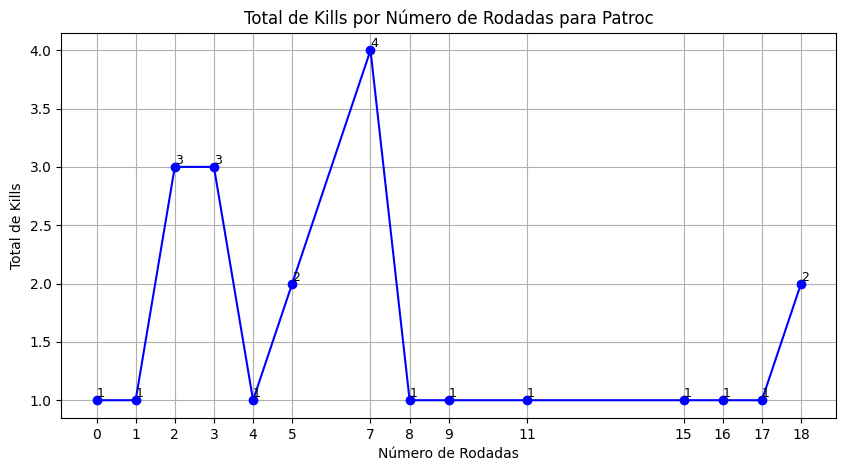

In [14]:
import matplotlib.pyplot as plt

filtered_df = df[df['attacker_name'] == 'Patroc']


plt.style.use('default')
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['total_rounds_played'], filtered_df['total_kills'], marker='o', linestyle='-', color='b')
plt.xticks(filtered_df['total_rounds_played'])

for x, y in zip(filtered_df['total_rounds_played'], filtered_df['total_kills']):
    plt.text(x, y, str(y), fontsize=9, ha='left', va='bottom', color='black')

plt.title('Total de Kills por Número de Rodadas para Patroc')
plt.xlabel('Número de Rodadas')
plt.ylabel('Total de Kills')


plt.grid(True)

plt.show()